In [2]:
from keras.layers import *
from keras.models import Sequential

In [3]:
model = Sequential()
model.add(Conv2D(32,(3,3),activation='relu', input_shape=(28,28,1)))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(64,(3,3),activation='relu',))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(64,(3,3),activation='relu'))

model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dense(10,activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten (Flatten)            (None, 576)               0         
_________________________________________________________________
dense (Dense)                (None, 64)                3

In [4]:
from keras.datasets import mnist
from keras.utils import to_categorical

(X_train,Y_train),(X_test,Y_test) = mnist.load_data()

11493376/11490434 [==============================] - 10s 1us/step


In [5]:
def preprocessing(X,Y):
    X = X.reshape((-1,28,28,1))
    X = X/255.0
    Y = to_categorical(Y)
    return X,Y

In [6]:
XTrain,YTrain = preprocessing(X_train,Y_train)
XTest,YTest = preprocessing(X_test,Y_test)


In [7]:
(X_train.shape,Y_train.shape),(X_test.shape,Y_test.shape)

(((60000, 28, 28), (60000,)), ((10000, 28, 28), (10000,)))

In [8]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['acc'])

In [10]:
hist = model.fit(XTrain,YTrain,batch_size=64,epochs=20,validation_split=0.2, steps_per_epoch=50)

Epoch 1/20
50/50 [==============================] - 7s 142ms/step - loss: 0.1301 - acc: 0.9600 - val_loss: 0.1077 - val_acc: 0.9679
Epoch 2/20
50/50 [==============================] - 7s 148ms/step - loss: 0.1083 - acc: 0.9678 - val_loss: 0.1011 - val_acc: 0.9697
Epoch 3/20
50/50 [==============================] - 9s 175ms/step - loss: 0.1060 - acc: 0.9663 - val_loss: 0.1230 - val_acc: 0.9626
Epoch 4/20
50/50 [==============================] - 11s 220ms/step - loss: 0.0889 - acc: 0.9734 - val_loss: 0.1084 - val_acc: 0.9672
Epoch 5/20
50/50 [==============================] - 11s 223ms/step - loss: 0.1048 - acc: 0.9700 - val_loss: 0.0925 - val_acc: 0.9712
Epoch 6/20
50/50 [==============================] - 8s 159ms/step - loss: 0.0869 - acc: 0.9756 - val_loss: 0.0818 - val_acc: 0.9752
Epoch 7/20
50/50 [==============================] - 7s 138ms/step - loss: 0.0742 - acc: 0.9756 - val_loss: 0.0755 - val_acc: 0.9774
Epoch 8/20
50/50 [==============================] - 6s 123ms/step - loss: 

In [11]:
model.evaluate(XTest,YTest)

313/313 [==============================] - 2s 8ms/step - loss: 0.0580 - acc: 0.9825


[0.05795850232243538, 0.9825000166893005]

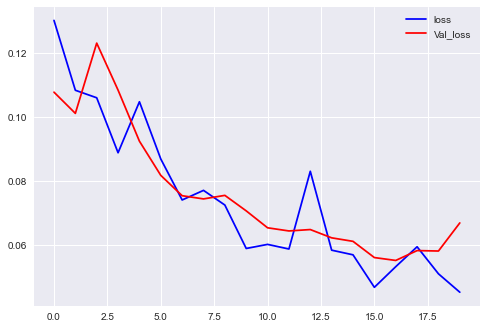

In [14]:
import matplotlib.pyplot as plt

plt.style.use('seaborn')
plt.plot(hist.history['loss'],label = 'loss',c='blue')
plt.plot(hist.history['val_loss'],label = 'Val_loss',c='red')
plt.legend()
plt.show()